# Exercise 2  Time series

**Aim:** The purpose of this lab is to get you started with elementary time series analysis: fitting a trend and a polynomial to a time series.

**Learning outcomes:** At the end of this lab, you will be able to:
1. Calculate a linear trend given a time series, and determine its slope and y-offset.
2. Calculate a polynomial fit to the time series, and determine the acceleration.
3. Gain basic familiarity with Python `xarray` data arrays, and familiarity with indices and NaNs.
<!--4. Use the functions including: nanmean, detrend, polyfit, polyval, disp, grid, find, isnan, sqrt, and the operators ==, ~ and .^2.-->

**Data:** You will work with a time series of monthly sea surface temperature.

**Directions:** Answer the questions, create an `*.ipynb` and one figure.

```{seealso}
Xarray docs: [https://docs.xarray.dev/en/latest/user-guide/time-series.html](https://docs.xarray.dev/en/latest/user-guide/time-series.html)

```
<hr>

## Create a notebook & load the data

1. Create an `*.ipynb` containing the commands for this assignment, or copy this file.  
    
    ```{admonition} File naming convention
    Name your python notebook something useful `ex<X>-<slug>-<Lastname>-seaocn.ipynb` where you replace `<X>` with the exercise number and `<slug>` with the short slug to name the topic, and `<Lastname>` with your last name.
    
    Figures should be named something like `ex<X>fig<Y>-<slug>-<Lastname>-seaocn.png` where you replace `<X>` with the exercise number, `<Y>` with the figure number, and `<Lastname>` with your last name.
    ```

2. Import necessary packages.  

    For example, `matplotlib` and `pandas` and `numpy` and `xarray`.  You may also need
    ```{python}
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import xarray as xr
    from datetime import datetime
    ```

    If you are missing any of these packages, please refer to [Resources: Python](../resource/python).


In [1]:
# Importing required packages here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

### Download some data

Go to the [KNMI climate explorer](https://climexp.knmi.nl/start.cgi) and download a time series of monthly sea surface temperature since 1850.

1. Click "Monthly Observations" on the right

2. Choose temperature from "Berkeley 1 deg"

3. Select a latitude and longitude in the ocean. Enter a range into the latitude which is 1 degree wide.  Note that for the southern hemisphere, you should use negative values.  For degrees west you should use "negative degrees east".

4. After entering values in the 2 latititude and 2 longitude boxes, click the choice "subset of the field" after make.

5. Click the button "Make time series".

6. Scroll to the bottom of the page, and find the line "If you *really* want to get it here, <data file name> is available as a netcdf file.  Click the link with "netcdf file" to download your data.

7. Put the data into the `data/` folder on your computer.  This should be accessible from the location of your python exercises.


In [2]:
# Your code here
file_path = '../data/'
filename = 'HadCRUT.4.6.0.0.median_-35--34E_60-61N_su.nc'
filename = 'TAVG_landocean_LatLong1_-51--50E_30-31N.nc'

# To concatenate two strings in python, you use the '+' symbol
fname = file_path + filename
# Try a `print` on your new variable to see what it is
print(fname)

../data/TAVG_landocean_LatLong1_-51--50E_30-31N.nc


### Load the data

The data are in a netCDF file.  As before, we will use `xarray` to handle the dataset.  Make sure you have included `xarray` in your cell above importing packages.

```
import xarray as xr
```

In [3]:
# Loading the data
#  --> Uncomment this line.  Note that it will throw an error.  After troubleshooting the error, you can comment it back out again.
#sst1 = xr.open_dataset(fname)


### Errors with time format

One of the things that can cause a headache in python is time formatting, and we see this here.

Depending on your installation, `xarray` cannot decode the time format which, from the error message, we see is in units of "months since 1850-01-01".  The error message itself recommends a (temporary) fix by using `decode_times=False`.

1. Try loading the data using this hint.
  
2. Note the format of the time - it's now integers counting from 0 to 2077, which doesn't look like "time"

3. Create a time vector representing the time (you may need to refer back to your error message above to see what the time should be).

In [4]:
# Loading the data - with 'decode_times=False'
sst1 = xr.open_dataset(fname, decode_times=False);
print(sst1)
# sst1.time runs from 0 = January 1850 to 2063 = 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/eddifying/Library/Mobile Documents/com~apple~CloudDocs/Work/teaching/SeaOcn-UHH/coursebook_seaocn/seaocn-cb/data/TAVG_landocean_LatLong1_-51--50E_30-31N.nc'

In [12]:
# Create a time vector
NN = len(sst1.time)
time = pd.date_range("1849-12-31", freq="m", periods=NN) + pd.DateOffset(1)
print(time)

# Now replace these values in the time vector for the xarray object
sst1 = sst1.assign_coords({"time": time.values})


DatetimeIndex(['1850-01-01', '1850-02-01', '1850-03-01', '1850-04-01',
               '1850-05-01', '1850-06-01', '1850-07-01', '1850-08-01',
               '1850-09-01', '1850-10-01',
               ...
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', length=2078, freq=None)


## Fig 1. Plot the time series

Plot your sea surface temperature against time.

A simple tutorial from `matplotlib` for making a plot: [https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)

Replot the time series.  Try adding a grid using `plt.grid()`.  Now try adding only horizontal grid lines.  Try reformating the x-axis labels.  


In [14]:
# Making a time series plot
# --> The following line will throw an error.  Try to troubleshoot the error.

# plt.plot(sst1.time, sst1.temperature, linewidth=2.0)


The above code should generate an error for you, i.e. python says it can't compute what you've asked it to for some reason.  The last line of the error may look something like:

    ValueError: x and y can be no greater than 2D, but have shapes (2078,) and (2078, 1, 1)


### Errors

Try reading the error message you got from the previous line.  It is trying to tell you that there is a problem with plotting your data variable `temperature` because it is 3-dimensional (in this case, its "shape" is (2064,1,1) meaning that the number of rows is 2064, the number of columns is 1 and the number of elements in the 3rd dimension is also 1.

As humans, we might see this as 1-dimensional, but python has a problem with it.

### Fixing dimensionality

There are two ways to deal with this problem.  

1. Since the time series is really something like 2078 long, and the 2nd and 3rd dimensions are not needed, we can do this by using the indexing

    `tanom = sst1.temperature[:,0,0]`

   This says we want all the data from the variable "temperature" in the first dimension ("all" is given by the colon ":" by itself, and the first element in the second dimension (given by 0) and the first element in the third dimension (given by the second zero).  *Note: in python, indexing (referring to a location in a vector or matrix) starts counting at zero, so the first element in a sequence has an index of 0, the second element has an index of 1, and so on.*

2. An alternative option using `xarray` functionality:  In the case of our sea surface tempearture dataset, since we've chosen a 1x1 degree region, the latitude and longitude dimensions are singular (length 1), and the only dimension we want to retain (the "time" dimension) is length 2064, we can use a funny little function for `xarray` called:

```
xr.DataArray.squeeze()
```

This will take our dataset and squeeze out (remove) the extra dimensions.

Try both of these options, and then use the `print` commands to see what resulted.


In [21]:
# Verify how large your temperature variable is (how long in each dimension)
print(sst1.temperature.shape)

# Directly index the parts we need
tanom = sst1.temperature[:,0,0]
print('---- Option 1: ----')
print(tanom)

print('---- Option 2: ----')
# Use xarray "squeeze"
sst_squeeze = xr.DataArray.squeeze(sst1);
sst_squeeze = sst1.squeeze()
print(sst_squeeze)

(2078, 1, 1)
---- Option 1: ----
<xarray.DataArray 'temperature' (time: 2078)>
array([-0.014259, -1.079289, -0.972797, ...,  0.855883,  0.941705,  1.105853],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-02-01
    lon      float32 -50.5
    lat      float32 30.5
Attributes:
    long_name:      Air Surface Temperature Anomaly
    standard_name:  surface_temperature_anomaly
    units:          degree C
---- Option 2: ----
<xarray.Dataset>
Dimensions:      (time: 2078)
Coordinates:
  * time         (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2023-02-01
    lon          float32 -50.5
    lat          float32 30.5
Data variables:
    temperature  (time) float32 -0.01426 -1.079 -0.9728 ... 0.8559 0.9417 1.106
Attributes: (12/24)
    title:                      subset of Native Format Berkeley Earth Surfac...
    Conventions:                CF-1.0
    source_field:               https://climexp.knmi.nl/select.cgi?field=berk...
    cdi:

### Re-try your plotting

Note that if this still doesn't work, it is possible that your data are not actually 1-dimensional.  You can see this if you check the "shape" of your data. When choosing a dataset to download from KNMI climate explorer, verify that the longitude and latitude ranges were each only 1 degree wide.  Check the size of your data variable again:

    print(sst1.temperature.shape)

The first number in brackets can be $>1$ but the other two should be $=1$.  If the second or third dimensions are $>1$, then this is probably where you asked KNMI climate explorer for SSTs in a region that was larger than 1 degree latitude or 1 degree longitude.  Go back and redownload your data.

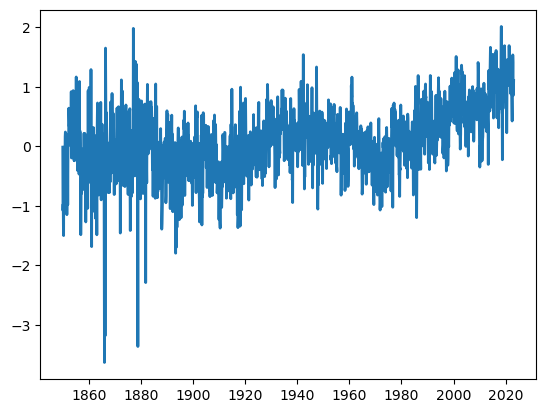

In [22]:
# Retry your plot with the 1-dimensional temperature vector
plt.plot(sst_squeeze.time, sst_squeeze.temperature, linewidth=2.0)


## Explore the data

1. What is the mean of the data?  

    ```{seealso}
    [xarray: Computation](https://docs.xarray.dev/en/stable/user-guide/computation.html)
    ```

2. What is the first temperature? the minumum temperature?

3. What is the last temperature value?  the maximum temperature?

4. How many years long is the record?

5. How quickly is SST rising? *Calculate this using your first, last and time span of the data.*

6. What is the average SST in the last year of the dataset?  In the first year? Re-estimate how quickly SST is rising using these annually averaged values.

**Experiment with printing your answer to the screen.**

```{python}
tmean = sst_squeeze.temperature.mean()
print('The mean is ' + str(tmean.values) + u'\N}{DEGREE SIGN}C.')
```

or

```{python}
print('The median is ' + str(sst_squeeze.temperature.median()) + u'\N}{DEGREE SIGN}C.')
```

Recall what the '+' does between two strings.  (We saw this above when we were working with the file path and name.)

7. Now note that your numbers previously calculated had a lot of significant digits.  Suppose the temperature dataset is only accurate to 0.01 deg C.  Use the `.round()` function to round everything to 2 digits past the decimal place.

```{python}
print('The first temperature value is ' + str(sst_squeeze.temperature[0].round(2) + u'\N}{DEGREE SIGN}C.')
```

```{note}
When should you bundle the whole string of commands together, and when should you break it into steps?  There are a few considerations here.

1. Will I use a computed value again?  If so, then you probably want to save it as something (as in the example of computing tmean and then printing its values.

2. Which option is better for readability?  If the computation is long and complex, it may be hard to keep track of what is happening where and when, which can often lead to errors.  In this case, separating it out is also useful.

3. If you only need it once, and the calculation is fairly straightforward (like here, the calculation of the mean or median, and only for display purposes) then your code will overall be more compact if you put it in the same line as the print command.
```


In [37]:
# Mean and median
tmean = sst_squeeze.temperature.mean()
tmed = sst_squeeze.temperature.median()
tfirst = sst_squeeze.temperature[0]
tmax = sst_squeeze.temperature.max()
tlast = sst_squeeze.temperature[-1]
tmin = sst_squeeze.temperature.min()

print('The mean is ' + str(tmean.values.round(2)) + u'\N{DEGREE SIGN}C.')

The mean is 0.09°C.


In [45]:
# Calculating the time difference between the end and beginning
# You may need the time delta idea.
# See https://numpy.org/doc/stable/reference/arrays.datetime.html

# What are the units of range_time?
range_time = (sst_squeeze.time.max()-sst_squeeze.time.min())

# Convert to the number of days
range_days = range_time.astype('timedelta64[D]') / np.timedelta64(1,'D')
print('There are ' + str(range_days.values) + ' days between the end and start')

# But the question asks you for the range in years - so look at the documentation to see how to do this in years instead of days


There are 63218.0 days between the end and start


In [46]:
sst1st = sst_squeeze.loc[dict(time=slice("1850-01-01", "1851-01-01"))]

print('The mean in the first year is ' + str(sst1st.temperature.mean().values) + u'\N{DEGREE SIGN}C.')
print('The mean in the last year is ' + str(sst_squeeze.loc[dict(time=slice("2022-01-01", "2023-01-01"))].temperature.mean().values) + u'\N{DEGREE SIGN}C.')

The mean in the first year is -0.52737033°C.
The mean in the last year is 1.0382488°C.


(array([  1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   2.,   0.,   0.,   1.,   3.,   4.,   4.,   5.,   5.,   5.,
          4.,   8.,   9.,   9.,  15.,  24.,  26.,  20.,  28.,  30.,  27.,
         59.,  46.,  64.,  63.,  65.,  74.,  82.,  88.,  86., 102.,  99.,
         79., 106.,  82.,  67.,  76.,  67.,  61.,  63.,  58.,  47.,  43.,
         38.,  29.,  24.,  23.,  27.,  25.,  12.,  16.,  16.,  11.,   7.,
          9.,   8.,   6.,   7.,   1.,   2.,   2.,   1.,   0.,   0.,   0.,
          2.]),
 array([-3.63311291, -3.57665253, -3.52019215, -3.46373177, -3.40727162,
        -3.35081124, -3.29435086, -3.23789048, -3.1814301 , -3.12496972,
        -3.06850934, -3.0120492 , -2.95558882, -2.89912844, -2.84266806,
        -2.78620768, -2.7297473 , -2.67328691, -2.61682677, -2.56036639,
        -2.50390601, -2.44

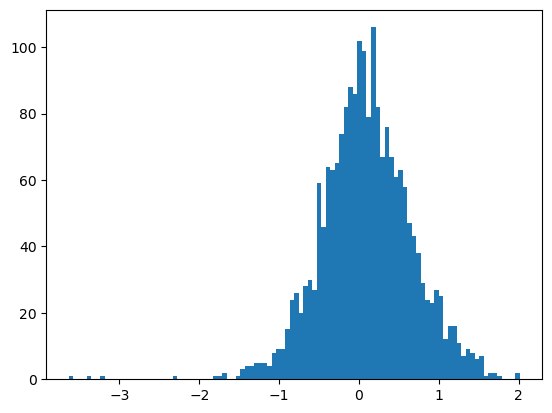

In [47]:
# Make a histogram of the first year's sst
plt.hist(sst_squeeze.temperature, 100)

## Fig 2. Plot an annual cycle

1. Extract the January data from the time series.  See how in [xarray: Time series data](https://docs.xarray.dev/en/stable/user-guide/time-series.html).  

2. Calculate the mean for January

3. Plot the seasonal cycle, calculated as monthly averages, in a new figure.  Add appropriate annotations.  Save this figure as `ex<X>fig<Y>_<Lastname>-seaocn.png`.

4. Next step: Estimate a standard error (SE) for the mean of each monthly value, where the standard error is

    $$SE = \frac{\sigma}{\sqrt{N}}$$

    with $\sigma$ the standard deviation and $N$ the number of values.  A quick-and-dirty estimate would have, for January, that $\sigma$ is the standard deviation of January values, and $N$ the number of years of measurements.  This is fine for a first estimate.  However, notice from your earlier time series plot that there are some gaps in the data record , especially prior to 1920.  So this means that the number of years is not equal to 2063 (length of the time series) divided by 12 months.  *Recall that the standard error calculation assumes a few things: that your measurements are independent (this is not quite true here) and that your data are normally distributed.  Check your histogram above to see whether the data are normal.*

   Then try plotting the annual cycle and add shading around the time series to indicate the standard error.

   See the `matplotlib.pyplot.fill_between` command.  Experiment with the optional argument `alpha`.  Try giving `alpha=.8` or `alpha=.3`.

5.  Export this figure as figure 2, using the file naming convention.


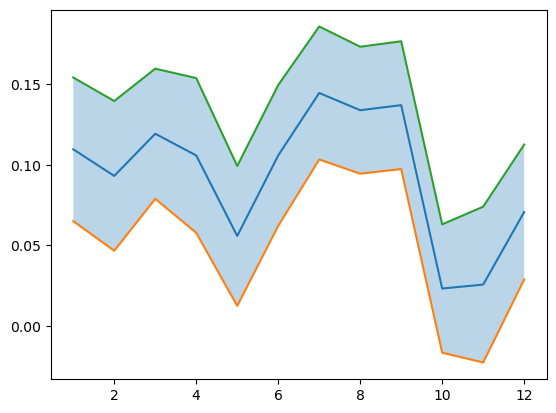

In [49]:
# Calculate an annual cycle
sst_ann = sst_squeeze.groupby("time.month").mean()
plt.plot(sst_ann.month, sst_ann.temperature)

numyears = len(sst_squeeze.time)/12
sst_std_ann = sst_squeeze.groupby("time.month").std()
plt.plot(sst_ann.month, sst_ann.temperature - sst_std_ann.temperature/np.sqrt(numyears))
plt.plot(sst_ann.month, sst_ann.temperature + sst_std_ann.temperature/np.sqrt(numyears))

upper_lim = sst_ann.temperature + sst_std_ann.temperature/np.sqrt(numyears)
lower_lim = sst_ann.temperature - sst_std_ann.temperature/np.sqrt(numyears)

plt.fill_between(sst_ann.month, upper_lim, lower_lim, alpha=.3)

## Fitting a trend - updating Fig. 1

Find a line of best fit to the original data.  

1. Fit a first degree polynomial (linear regression).  Recall that a 1st order polynomial has the form

    $$Ax + B$$

    where $A$ is the slope.  Read how to use the function [xarray.Dataset.polyfit](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.polyfit.html).  You should use the time dimension as your coordinate along which to fit the 1st degree polynomial (a line).  

2. What is the slope of the line?  What are the units on the slope?

3. Convert this to units of degrees/year.

  *Question for thought:* How does this compare to the slope you calculated above when looking at the maximum and minimum of the time series, and time series length?

4. Using your linear regression, what temperature would you predict in 1960?  Use the function [xarray.polyval](https://docs.xarray.dev/en/stable/generated/xarray.polyval.html#xarray.polyval) to compute this.

5. What was the observed value in 1960?  Use `xarray` functions to extract the year of 1960 and calculate an average over that year.

6. Add the line of best fit to your original plot of the full dataset (or replot here).


7. Now fit a polynomial of degree 2 (a quadratic).  A second degree polynomial has the form

    $$Ax^2 + Bx + C$$

    where $A$ is the acceleration.  What are the units on $A$?

8. Add this polynomial as a third curve on your plot.

9. **Clean up the plot.**  This means, add a legend, axes labels, fix the time axis annotations if needed, and fix the fontsize to be legible even if the figure is small.

```{note}
In future exercises, you will be expected to clean up all plots without reminders.  All plots should have axes labelled (with units!), legible font size (bigger than you think) and appropriate axis ranges.  Legends should be used whenever more than one quantity is plotted.
```

10. Save the figure as a new version of your figure 1, *overwriting* the previous version.


<xarray.Dataset>
Dimensions:                           (degree: 2)
Coordinates:
  * degree                            (degree) int64 1 0
Data variables:
    temperature_polyfit_coefficients  (degree) float64 0.005066 -9.702
Attributes: (12/24)
    title:                      subset of Native Format Berkeley Earth Surfac...
    Conventions:                CF-1.0
    source_field:               https://climexp.knmi.nl/select.cgi?field=berk...
    cdi:                        Climate Data Interface version 2.0.5 (https:/...
    institution:                KNMI Climate Explorer and Berkeley Earth Surf...
    land_source_history:        05-Mar-2023 08:24:35
    ...                         ...
    geospatial_lon_resolution:  1.0
    time_coverage_start:        1850-01-15
    time_coverage_end:          2023-02-15
    climexp_url:                https://climexp.knmi.nl/select.cgi?berkeley_l...
    scripturl01:                http://climexp.knmi.nl/get_index.cgi?email=so...
    history:        

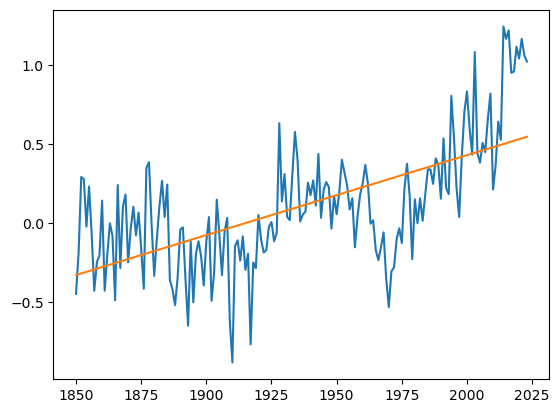

In [13]:
# Fitting a trend 
sst_year = sst_squeeze.groupby("time.year").median()
plt.plot(sst_year.year, sst_year.temperature)

# Dataset.polyfit(dim, deg, skipna=None, rcond=None, w=None, full=False, cov=False)
pf = sst_year.polyfit('year', 1)
print(pf)

poly1 = xr.polyval(sst_year.year, pf.temperature_polyfit_coefficients, degree_dim='degree')
plt.plot(sst_year.year, poly1)

# Filtering and spectra

In the above section, you've done some quick and easy filtering by making annual averages.  Now we'll try something a little more complicated using tide gauge data.

Pick a tide gauge from the east coast of the USA: [https://www.bodc.ac.uk/data/hosted_data_systems/sea_level/international/north_atlantic/#Duck](https://www.bodc.ac.uk/data/hosted_data_systems/sea_level/international/north_atlantic/#Duck) and download the data in `*.nc` format.

Put the file in your `data/` directory.




In [13]:
import scipy.signal as sg  #Package for signal analysis
import scipy.ndimage as si #Another package for signal analysis
#from scipy.interpolate import interp1d  #for converting cell to grid-centered coordinates
#from scipy import stats    #Used for 2D binned statistics
#from mpl_toolkits.axes_grid1 import make_axes_locatable #For plotting interior colobars
#import cartopy.crs as ccrs

from multitaper import MTSpec  #using German Prieto's multitaper package, https://github.com/gaprieto/multitaper
from scipy import fft as spfft
from scipy.fft import fft 
from scipy.stats import chi2
from scipy.special import digamma

plt.rcParams["figure.figsize"] = (10,6.5) #set default figure size
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'serif'

In [4]:
file_path = '../data/'
filename = 'w9006.nc'
fname = file_path + filename
td = xr.open_dataset(fname)
print(td)

<xarray.Dataset>
Dimensions:                   (time: 66042, latitude: 1, longitude: 1)
Coordinates:
  * time                      (time) datetime64[ns] 1992-01-01T04:59:59.99957...
  * latitude                  (latitude) float32 35.22
  * longitude                 (longitude) float32 -75.64
Data variables:
    woce_date                 (time) int32 ...
    woce_time                 (time) float32 ...
    sea_level_1               (time, latitude, longitude) float32 ...
    sea_level_quality_flag_1  (time, latitude, longitude) |S1 ...
Attributes: (12/98)
    WOCE_Version:  3.0
    Conventions:   COARDS/WOCE
    DAC_ID:        FS006731
    DOC_01_0000:   BODC Document Reference Number   62913 (61 lines)
    DOC_01_0001:   
    DOC_01_0002:                        Site History : Cape Hatteras, N.C. U....
    ...            ...
    BODC_QC_16:    R     Replacement value
    BODC_QC_17:    S     Estimated value
    BODC_QC_18:    T     Interpolated value
    BODC_QC_19:    U     Uncalibrat

In [5]:
td_squeeze = td.squeeze()
print(td_squeeze)

<xarray.Dataset>
Dimensions:                   (time: 66042)
Coordinates:
  * time                      (time) datetime64[ns] 1992-01-01T04:59:59.99957...
    latitude                  float32 35.22
    longitude                 float32 -75.64
Data variables:
    woce_date                 (time) int32 ...
    woce_time                 (time) float32 ...
    sea_level_1               (time) float32 ...
    sea_level_quality_flag_1  (time) |S1 ...
Attributes: (12/98)
    WOCE_Version:  3.0
    Conventions:   COARDS/WOCE
    DAC_ID:        FS006731
    DOC_01_0000:   BODC Document Reference Number   62913 (61 lines)
    DOC_01_0001:   
    DOC_01_0002:                        Site History : Cape Hatteras, N.C. U....
    ...            ...
    BODC_QC_16:    R     Replacement value
    BODC_QC_17:    S     Estimated value
    BODC_QC_18:    T     Interpolated value
    BODC_QC_19:    U     Uncalibrated
    BODC_QC_20:    W     Control value
    BODC_QC_21:    X     Excessive difference


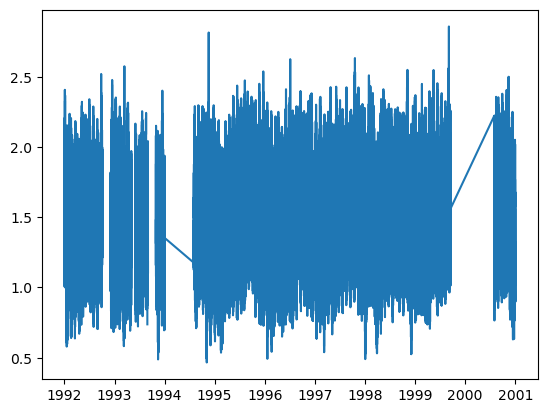

In [6]:
plt.plot(td_squeeze.time,td_squeeze.sea_level_1)

# Select a one year time period

Pick a year that looks filled in.  I.e., straight lines between big blocks of color are probably because there's not data.


```{seealso}
[https://docs.xarray.dev/en/stable/user-guide/indexing.html](https://docs.xarray.dev/en/stable/user-guide/indexing.html)
```



In [8]:
td_1995 = td_squeeze.loc[dict(time=slice("1995-01-01", "1995-02-01"))]
td_1995 = td_1995.drop_vars(["woce_date","woce_time","sea_level_quality_flag_1"])
             
print(td_1995)
      

<xarray.Dataset>
Dimensions:      (time: 768)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-01 ... 1995-02-01T22:59:59.998...
    latitude     float32 35.22
    longitude    float32 -75.64
Data variables:
    sea_level_1  (time) float32 1.917 1.704 1.442 1.198 ... 0.96 1.204 1.466
Attributes: (12/98)
    WOCE_Version:  3.0
    Conventions:   COARDS/WOCE
    DAC_ID:        FS006731
    DOC_01_0000:   BODC Document Reference Number   62913 (61 lines)
    DOC_01_0001:   
    DOC_01_0002:                        Site History : Cape Hatteras, N.C. U....
    ...            ...
    BODC_QC_16:    R     Replacement value
    BODC_QC_17:    S     Estimated value
    BODC_QC_18:    T     Interpolated value
    BODC_QC_19:    U     Uncalibrated
    BODC_QC_20:    W     Control value
    BODC_QC_21:    X     Excessive difference


In [9]:
print(td_1995)

<xarray.Dataset>
Dimensions:      (time: 768)
Coordinates:
  * time         (time) datetime64[ns] 1995-01-01 ... 1995-02-01T22:59:59.998...
    latitude     float32 35.22
    longitude    float32 -75.64
Data variables:
    sea_level_1  (time) float32 1.917 1.704 1.442 1.198 ... 0.96 1.204 1.466
Attributes: (12/98)
    WOCE_Version:  3.0
    Conventions:   COARDS/WOCE
    DAC_ID:        FS006731
    DOC_01_0000:   BODC Document Reference Number   62913 (61 lines)
    DOC_01_0001:   
    DOC_01_0002:                        Site History : Cape Hatteras, N.C. U....
    ...            ...
    BODC_QC_16:    R     Replacement value
    BODC_QC_17:    S     Estimated value
    BODC_QC_18:    T     Interpolated value
    BODC_QC_19:    U     Uncalibrated
    BODC_QC_20:    W     Control value
    BODC_QC_21:    X     Excessive difference


In [10]:
filt48 = td_1995.rolling(time=48, min_periods=12).mean()

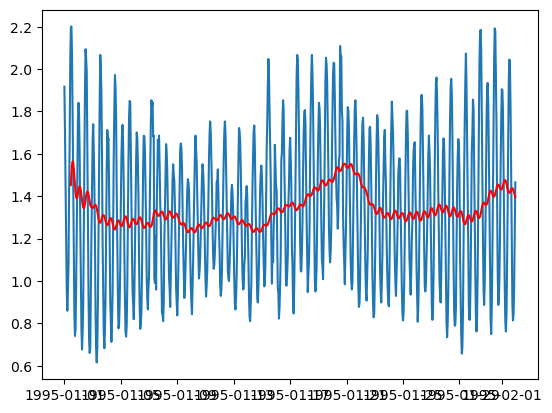

In [11]:
plt.plot(td_1995.time,td_1995.sea_level_1)
plt.plot(filt48.time,filt48.sea_level_1,color = 'red')

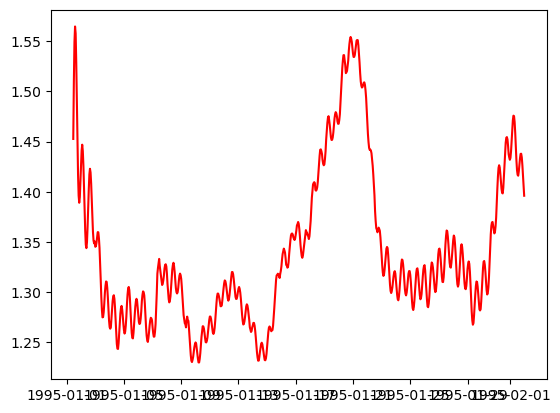

In [12]:
plt.plot(filt48.time,filt48.sea_level_1,color = 'red')

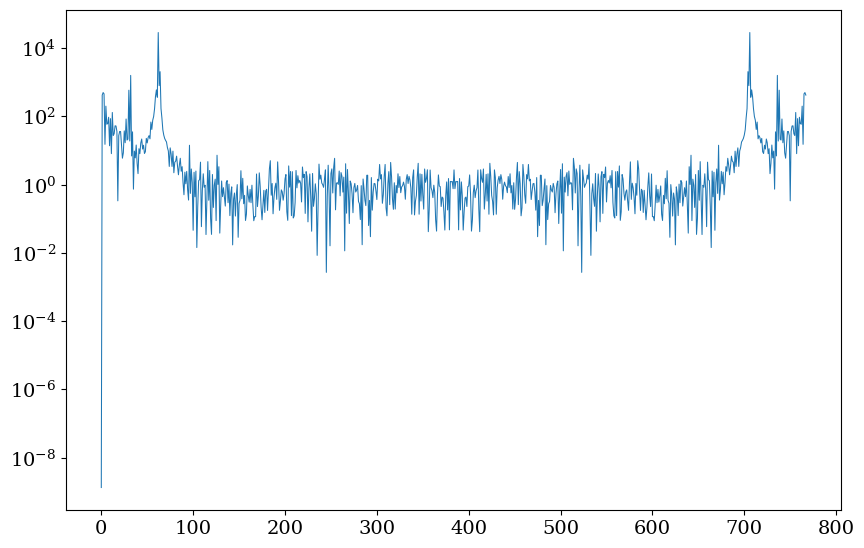

In [16]:
# Has this removed the diurnal cycle?
cv = td_1995.sea_level_1.values
fig, ax = plt.subplots(1, 1)
ax.semilogy(np.abs(fft(cv-np.mean(cv)))**2,linewidth=0.75)


In [18]:
dt = ds["num"][1].data - ds["num"][0].data #sampling interval in days
f, S = sg.periodogram(cv-np.mean(cv), fs=1/dt) #fs = sampling frequency (cyclic)
omega = f*2*np.pi #convert cyclic frequency to radian frequency

NameError: name 'ds' is not defined